<a href="https://colab.research.google.com/github/financieras/math/blob/main/regresion/regresion_lineal02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal por descenso del gradiente
Se puede llegar a estimar la recta que mejor se ajunta a una nube de puntos por varios métodos:
    1. Método de los mínimos cuadrados
    2. Método del descenso del gradiente

En esta ocasión realizaremos el segundo método que es un método más general para cualquier tipo de función de costes, sea o no convexa.

Para funciones no convexas tendremos que usar el método de optimización del descenso del gradiente.

* Vídeos del canal DotCSV:
1. [Regresión Lineal y Mínimos Cuadrados Ordinarios](https://youtu.be/k964_uNn3l0?si=CrX_Ut2BX80crwMR)
2. [IA NOTEBOOK #1 | Regresión Lineal y Mínimos Cuadrados Ordinarios | Programando IA](https://youtu.be/w2RJ1D6kz-o?si=3F_02_vXuec-PwWD)
2. [¿Qué es el Descenso del Gradiente?](https://youtu.be/A6FiCDoz8_4?si=tYy-0WOvgQMLoQeA)
3. [Descenso del Gradiente (Gradient Descent) | Programando IA](https://youtu.be/-_A_AAxqzCg?si=F_0h1LNfCkd1o6FX)

In [1]:
# obtenemos el archivo data.csv que queda en local para poder usarlo desde este notebook
!wget https://raw.githubusercontent.com/financieras/math/main/regresion/ft-linear-regression/data/data.csv
# He modificado la URL original para usar la versión "raw" del archivo, que es necesaria para la descarga directa.
# url original:      https://github.com/financieras/math/blob/main/regresion/ft-linear-regression/data/data.csv

!ls
!head -n 5 data.csv

--2024-10-30 17:50:32--  https://raw.githubusercontent.com/financieras/math/main/regresion/ft-linear-regression/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281 [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]     281  --.-KB/s    in 0s      

2024-10-30 17:50:33 (9.77 MB/s) - ‘data.csv’ saved [281/281]

data.csv  sample_data
km,price
240000,3650
139800,3800
150500,4400
185530,4450


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('data.csv')    # df representa el DataFrame

# Crear el array X (kilómetros) como vector unidimensional
X = df['km'].values

# Crear el array Y (precios)
Y = df['price'].values

# Verificar la forma de los arrays
print("Forma de X:", X.shape)
print("Forma de Y:", Y.shape)

# Mostrar los primeros elementos de cada array
print("\nPrimeros elementos de X:")
print(X[:5])
print("\nPrimeros elementos de Y:")
print(Y[:5])

Forma de X: (24,)
Forma de Y: (24,)

Primeros elementos de X:
[240000 139800 150500 185530 176000]

Primeros elementos de Y:
[3650 3800 4400 4450 5250]


In [7]:
type(X)     # tanto el vector X como el Y son ndarrays

numpy.ndarray

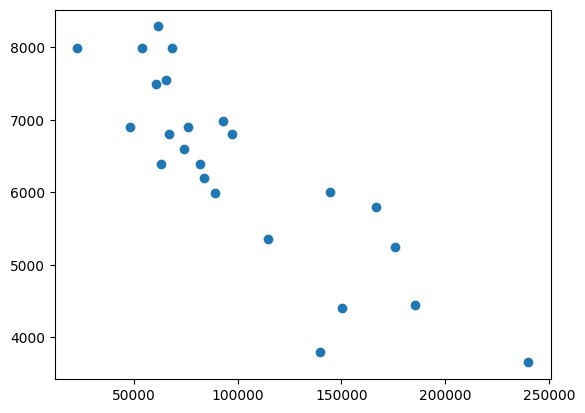

In [9]:
plt.scatter(X, Y)